## RabattCorner

In [1]:
from fastai.tabular import *

### Dataset

Read dataset

In [2]:
PATH='./'

In [3]:
table_names = ['rc']

In [4]:
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

In [5]:
df = tables[0]

In [6]:
df.head()

,start_year,start_month,user_id,signup_year,signup_month,postal0,postal1,postal2,postal3,gender,language,birthday,partner_id,previous_visit_count,sum_amount
0,2017,1,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,7,2,0.001
1,2017,1,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,12,0,0.001
2,2017,1,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,16,1,0.001
3,2017,1,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,19,0,0.001
4,2017,1,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,26,0,0.001


### Remove NAN values

Next we'll fill in missing values to avoid complications with NA's. NA (not available) is how Pandas indicates missing values; many models have problems when missing values are present, so it's always important to think about how to deal with them. In these cases, we are picking an arbitrary signal value that doesn't otherwise appear in the data.

In [7]:
df['postal0'] = df.postal0.fillna(-1)
df['postal1'] = df.postal1.fillna(-1)
df['postal2'] = df.postal2.fillna(-1)
df['postal3'] = df.postal3.fillna(-1)
df['gender'] = df.gender.fillna(0)
df['birthday'] = df.birthday.fillna(1000)

In [8]:
df.isnull().values.any()

False

In [9]:
dep_var = 'sum_amount'
cat_names = ['start_year', 'start_month', 'user_id', 'signup_year', 'signup_month', 'postal0', 'postal1', 'postal2', 'postal3', 'gender', 'language', 'birthday', 'partner_id']
cont_names = ['previous_visit_count']
procs = [FillMissing, Categorify, Normalize]

### !!! SAMPLE DATASET !!!

In [17]:
df_sample = df.iloc[22294272:].copy()

In [18]:
df_sample

,start_year,start_month,user_id,signup_year,signup_month,postal0,postal1,postal2,postal3,gender,language,birthday,partner_id,previous_visit_count,sum_amount
22294272,2019,1,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,7,2,0.001
22294273,2019,1,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,12,0,0.001
22294274,2019,1,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,16,1,0.001
22294275,2019,1,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,19,0,0.001
22294276,2019,1,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,26,0,0.001
22294277,2019,1,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,31,0,0.001
22294278,2019,1,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,32,0,0.001
22294279,2019,1,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,46,0,0.001
22294280,2019,1,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,56,0,0.001
22294281,2019,1,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,63,0,0.001


In [19]:
len(df_sample)

2786784

In [27]:
df_sample.iloc[928928]

start_year              2019.000
start_month                2.000
user_id                    1.000
signup_year             2012.000
signup_month              12.000
postal0                    8.000
postal1                    0.000
postal2                    5.000
postal3                    5.000
gender                     1.000
language                   2.000
birthday                1984.000
partner_id                 7.000
previous_visit_count       2.000
sum_amount                 0.001
Name: 23223200, dtype: float64

In [30]:
df_sample.iloc[1857856]

start_year              2019.000
start_month                3.000
user_id                    1.000
signup_year             2012.000
signup_month              12.000
postal0                    8.000
postal1                    0.000
postal2                    5.000
postal3                    5.000
gender                     1.000
language                   2.000
birthday                1984.000
partner_id                 7.000
previous_visit_count       2.000
sum_amount                 0.001
Name: 24152128, dtype: float64

Validator set

In [35]:
df_sample.iloc[928928:1857856]

,start_year,start_month,user_id,signup_year,signup_month,postal0,postal1,postal2,postal3,gender,language,birthday,partner_id,previous_visit_count,sum_amount
23223200,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,7,2,0.001
23223201,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,12,0,0.001
23223202,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,16,1,0.001
23223203,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,19,0,0.001
23223204,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,26,0,0.001
23223205,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,31,0,0.001
23223206,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,32,0,0.001
23223207,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,46,0,0.001
23223208,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,56,0,0.001
23223209,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,63,0,0.001


Test set

In [38]:
df_sample.iloc[1857856:]

,start_year,start_month,user_id,signup_year,signup_month,postal0,postal1,postal2,postal3,gender,language,birthday,partner_id,previous_visit_count,sum_amount
24152128,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,7,2,0.001
24152129,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,12,0,0.001
24152130,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,16,1,0.001
24152131,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,19,0,0.001
24152132,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,26,0,0.001
24152133,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,31,0,0.001
24152134,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,32,0,0.001
24152135,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,46,0,0.001
24152136,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,56,0,0.001
24152137,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,63,0,0.001


In [39]:
val_idx = list(range(928928, 1857856))

In [40]:
val_idx[0]

928928

In [41]:
val_idx[-1]

1857855

In [42]:
df_sample.iloc[val_idx]

,start_year,start_month,user_id,signup_year,signup_month,postal0,postal1,postal2,postal3,gender,language,birthday,partner_id,previous_visit_count,sum_amount
23223200,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,7,2,0.001
23223201,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,12,0,0.001
23223202,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,16,1,0.001
23223203,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,19,0,0.001
23223204,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,26,0,0.001
23223205,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,31,0,0.001
23223206,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,32,0,0.001
23223207,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,46,0,0.001
23223208,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,56,0,0.001
23223209,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,63,0,0.001


In [45]:
test = TabularList.from_df(df_sample.iloc[1857856:].copy(), path=PATH, cat_names=cat_names, cont_names=cont_names)

In [46]:
data = (TabularList.from_df(df_sample, path=PATH, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(val_idx)
                           .label_from_df(cols=dep_var, label_cls=FloatList)
                           .add_test(test_sample)
                           .databunch())

### !!! FULL DATASET !!!

In [10]:
len(df)

25081056

In [44]:
df.iloc[23223200]

start_year              2019.000
start_month                2.000
user_id                    1.000
signup_year             2012.000
signup_month              12.000
postal0                    8.000
postal1                    0.000
postal2                    5.000
postal3                    5.000
gender                     1.000
language                   2.000
birthday                1984.000
partner_id                 7.000
previous_visit_count       2.000
sum_amount                 0.001
Name: 23223200, dtype: float64

In [45]:
df.iloc[24152128]

start_year              2019.000
start_month                3.000
user_id                    1.000
signup_year             2012.000
signup_month              12.000
postal0                    8.000
postal1                    0.000
postal2                    5.000
postal3                    5.000
gender                     1.000
language                   2.000
birthday                1984.000
partner_id                 7.000
previous_visit_count       2.000
sum_amount                 0.001
Name: 24152128, dtype: float64

Validation set

In [46]:
df.iloc[23223200:24152128]

,start_year,start_month,user_id,signup_year,signup_month,postal0,postal1,postal2,postal3,gender,language,birthday,partner_id,previous_visit_count,sum_amount
23223200,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,7,2,0.001
23223201,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,12,0,0.001
23223202,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,16,1,0.001
23223203,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,19,0,0.001
23223204,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,26,0,0.001
23223205,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,31,0,0.001
23223206,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,32,0,0.001
23223207,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,46,0,0.001
23223208,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,56,0,0.001
23223209,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,63,0,0.001


Test set:

In [47]:
df.iloc[24152128:]

,start_year,start_month,user_id,signup_year,signup_month,postal0,postal1,postal2,postal3,gender,language,birthday,partner_id,previous_visit_count,sum_amount
24152128,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,7,2,0.001
24152129,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,12,0,0.001
24152130,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,16,1,0.001
24152131,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,19,0,0.001
24152132,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,26,0,0.001
24152133,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,31,0,0.001
24152134,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,32,0,0.001
24152135,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,46,0,0.001
24152136,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,56,0,0.001
24152137,2019,3,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,63,0,0.001


In [48]:
val_idx = list(range(23223200, 24152128))

In [49]:
val_idx[0]

23223200

In [50]:
val_idx[-1]

24152127

In [51]:
df.iloc[val_idx]

,start_year,start_month,user_id,signup_year,signup_month,postal0,postal1,postal2,postal3,gender,language,birthday,partner_id,previous_visit_count,sum_amount
23223200,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,7,2,0.001
23223201,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,12,0,0.001
23223202,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,16,1,0.001
23223203,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,19,0,0.001
23223204,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,26,0,0.001
23223205,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,31,0,0.001
23223206,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,32,0,0.001
23223207,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,46,0,0.001
23223208,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,56,0,0.001
23223209,2019,2,1,2012,12,8.0,0.0,5.0,5.0,1.0,2,1984.0,63,0,0.001


In [52]:
test = TabularList.from_df(df.iloc[24152128:].copy(), path=PATH, cat_names=cat_names, cont_names=cont_names)

In [53]:
data = (TabularList.from_df(df, path=PATH, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(val_idx)
                           .label_from_df(cols=dep_var, label_cls=FloatList)
                           .add_test(test)
                           .databunch())

### Training

In [47]:
data.show_batch(rows=10)

start_year,start_month,user_id,signup_year,signup_month,postal0,postal1,postal2,postal3,gender,language,birthday,partner_id,previous_visit_count,target
2019,3,25899,2018,1,3.0,6.0,6.0,2.0,1.0,1,1978.0,344,-0.0986,0.001
2019,3,14140,2017,1,-1.0,-1.0,-1.0,-1.0,1.0,1,1000.0,509,-0.0986,0.001
2019,3,1609,2013,10,3.0,1.0,1.0,0.0,2.0,1,1000.0,854,-0.0986,0.001
2019,3,1775,2013,11,3.0,5.0,5.0,5.0,1.0,1,1000.0,683,-0.0986,0.001
2019,3,13208,2017,1,-1.0,-1.0,-1.0,-1.0,2.0,1,1000.0,718,-0.0986,0.001
2019,1,6084,2015,12,6.0,0.0,2.0,6.0,1.0,1,1000.0,802,-0.0986,0.001
2019,1,3020,2014,5,9.0,2.0,0.0,0.0,2.0,1,1000.0,326,-0.0986,0.001
2019,1,5696,2015,12,8.0,0.0,0.0,5.0,1.0,1,1000.0,503,-0.0986,0.001
2019,3,3077,2014,6,-1.0,-1.0,-1.0,-1.0,1.0,1,1000.0,822,-0.0986,0.001
2019,1,20944,2017,10,-1.0,-1.0,-1.0,-1.0,2.0,1,1000.0,140,-0.0986,0.001


In [48]:
max_log_y = np.log(np.max(df['sum_amount'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [196]:
# https://forums.fast.ai/t/tabular-regressor-unable-to-predict-perfect-linear-relationship/32692/5

#learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
#learn = tabular_learner(data, layers=[200,100])

#learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, y_range=None)

#learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, y_range=y_range, metrics=exp_rmspe)
# learn.fit_one_cycle(3, 1e-2, wd=0.2)
# SAMPLE
# 1.359 # 4.837
# 11.420 # 4.794
# 0.792 # 4.769

#learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, y_range=None)
# learn.fit_one_cycle(6, 1e-3, wd=0.2)
# SAMPLE
# 1.210 # 12677.443
# 4.057 # 92.945
# 0.231 # 5.299
# 1.755 # 5.390
# 1.660 # 9.265
# 1.907 # 5.107

learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, y_range=y_range)

In [197]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


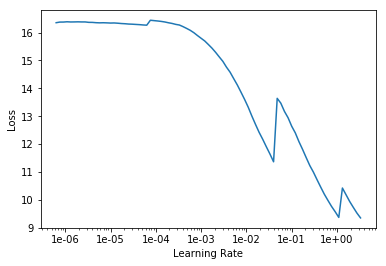

In [198]:
learn.recorder.plot()

In [199]:
# learn.fit(1, 1e-2)

#learn.fit_one_cycle(3, 1e-2, wd=0.2)

learn.fit_one_cycle(6, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,time
0,0.572196,4.791884,05:16
1,13.693814,4.767442,05:19
2,1.931408,4.783979,05:20
3,0.482147,4.783446,05:21
4,0.666600,4.792855,05:19
5,0.281977,4.773352,05:24


In [60]:
#learn.save('rc1')

In [ ]:
#learn.load('rc1')

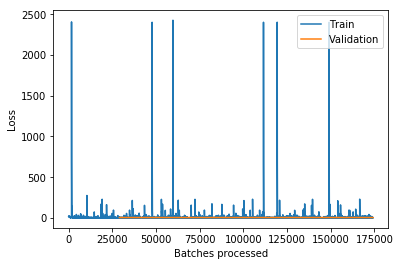

In [200]:
learn.recorder.plot_losses()

In [218]:
#row = df_sample.iloc[2785897:]
row = df_sample.iloc[2785896]
row

start_year               2019.000
start_month                 3.000
user_id                 44326.000
signup_year              2018.000
signup_month               12.000
postal0                    -1.000
postal1                    -1.000
postal2                    -1.000
postal3                    -1.000
gender                      1.000
language                    1.000
birthday                 1000.000
partner_id                823.000
previous_visit_count        0.000
sum_amount                  0.001
Name: 25080168, dtype: float64

In [219]:
pred = learn.predict(row)

In [220]:
pred[0]

FloatItem [0.141113]

In [221]:
np.exp(0.141113)

1.151554766321514

https://forums.fast.ai/t/predictions-to-df-csv/42729/6

https://forums.fast.ai/t/solved-how-to-do-data-de-normalization-for-prediction/44505/2

In [194]:
#row = df_sample.iloc[2785897:]
row = df_sample.iloc[2785897]
row

start_year               2019.00
start_month                 3.00
user_id                 44326.00
signup_year              2018.00
signup_month               12.00
postal0                    -1.00
postal1                    -1.00
postal2                    -1.00
postal3                    -1.00
gender                      1.00
language                    1.00
birthday                 1000.00
partner_id                824.00
previous_visit_count        0.00
sum_amount                 99.76
Name: 25080169, dtype: float64

In [195]:
learn.predict(row)

(FloatItem [-0.000227], tensor([-0.0002]), tensor([-0.0002]))

In [69]:
preds = learn.get_preds(ds_type=DatasetType.Test)

In [70]:
preds

[tensor([[0.0451],
         [0.0410],
         [0.0505],
         ...,
         [0.0542],
         [0.0496],
         [0.0626]]), tensor([0, 0, 0,  ..., 0, 0, 0])]

In [71]:
preds0 = preds[0].numpy()

In [72]:
preds1 = preds[1].numpy()

In [73]:
preds0

array([[0.04514 ],
       [0.040951],
       [0.050512],
       [0.039392],
       ...,
       [0.055629],
       [0.054192],
       [0.049602],
       [0.062616]], dtype=float32)

In [74]:
preds1

array([0, 0, 0, 0, ..., 0, 0, 0, 0])

In [75]:
preds_df_0 = pd.DataFrame(data=preds0)

In [76]:
preds_df_0

,0
0,0.045140
1,0.040951
2,0.050512
3,0.039392
4,0.041717
5,0.039746
6,0.037470
7,0.047359
8,0.037189
9,0.046536


In [77]:
preds_df_1 = pd.DataFrame(data=preds1)

In [82]:
preds_df_1.head(1000)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [38]:
preds_df_0.to_csv(f'{PATH}test0.csv')

In [39]:
preds_df_1.to_csv(f'{PATH}test1.csv')

In [40]:
#learn.save('rc2')